In [6]:
import fedot
import pandas as pd

In [2]:
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum

from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
from fedot.api.main import Fedot

In [12]:
forecasting_length = 90

task = Task(TaskTypesEnum.ts_forecasting, TsForecastingParams(forecast_length=forecasting_length))


data = InputData.from_csv_time_series(task, 'C:/Users/User/PycharmProjects/pythonProject8/hack/data/well0.csv', target_column='Дебит нефти')
data

InputData(idx=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177

In [13]:
train_data, test_data = train_test_data_setup(data)
train_data

InputData(idx=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177

In [16]:
composer_params = {'max_depth' : 4, 'max_arity' : 3, 'pop_size' : 20, 'num_of_generations' : 25, 'learning_time' : 15, 'preset' : 'light_tune'}

In [21]:
model = Fedot(problem='ts_forecasting', timeout=15, task_params=task.task_params)

chain = model.fit(features=train_data)

forecast = model.predict(features=test_data)

2023-02-24 16:05:48,260 - ApiComposer - Initial pipeline was fitted in 0.3 sec.
2023-02-24 16:05:48,267 - ApiComposer - AutoML configured. Parameters tuning: True Time limit: 15 min Set of candidate models: ['adareg', 'ar', 'arima', 'clstm', 'dtreg', 'gbr', 'lasso', 'lgbmreg', 'linear', 'rfr', 'ridge', 'polyfit', 'sgdr', 'stl_arima', 'glm', 'ets', 'locf', 'ts_naive_average', 'svr', 'treg', 'scaling', 'normalization', 'pca', 'fast_ica', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'isolation_forest_reg', 'lagged', 'sparse_lagged', 'smoothing', 'gaussian_filter', 'diff_filter', 'cut', 'exog_ts']
2023-02-24 16:05:48,272 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-02-24 16:14:48,517 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [09:00<?, ?gen/s]

2023-02-24 16:14:48,533 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


  2%|▏         | 2124/100000 [05:59<4:35:44,  5.92trial/s, best loss: 3.083856937833559] 
2023-02-24 16:20:47,932 - ApiComposer - Hyperparameters tuning finished
2023-02-24 16:20:48,088 - ApiComposer - Model generation finished
2023-02-24 16:20:48,241 - FEDOT logger - Final pipeline was fitted
2023-02-24 16:20:48,241 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, glm]}


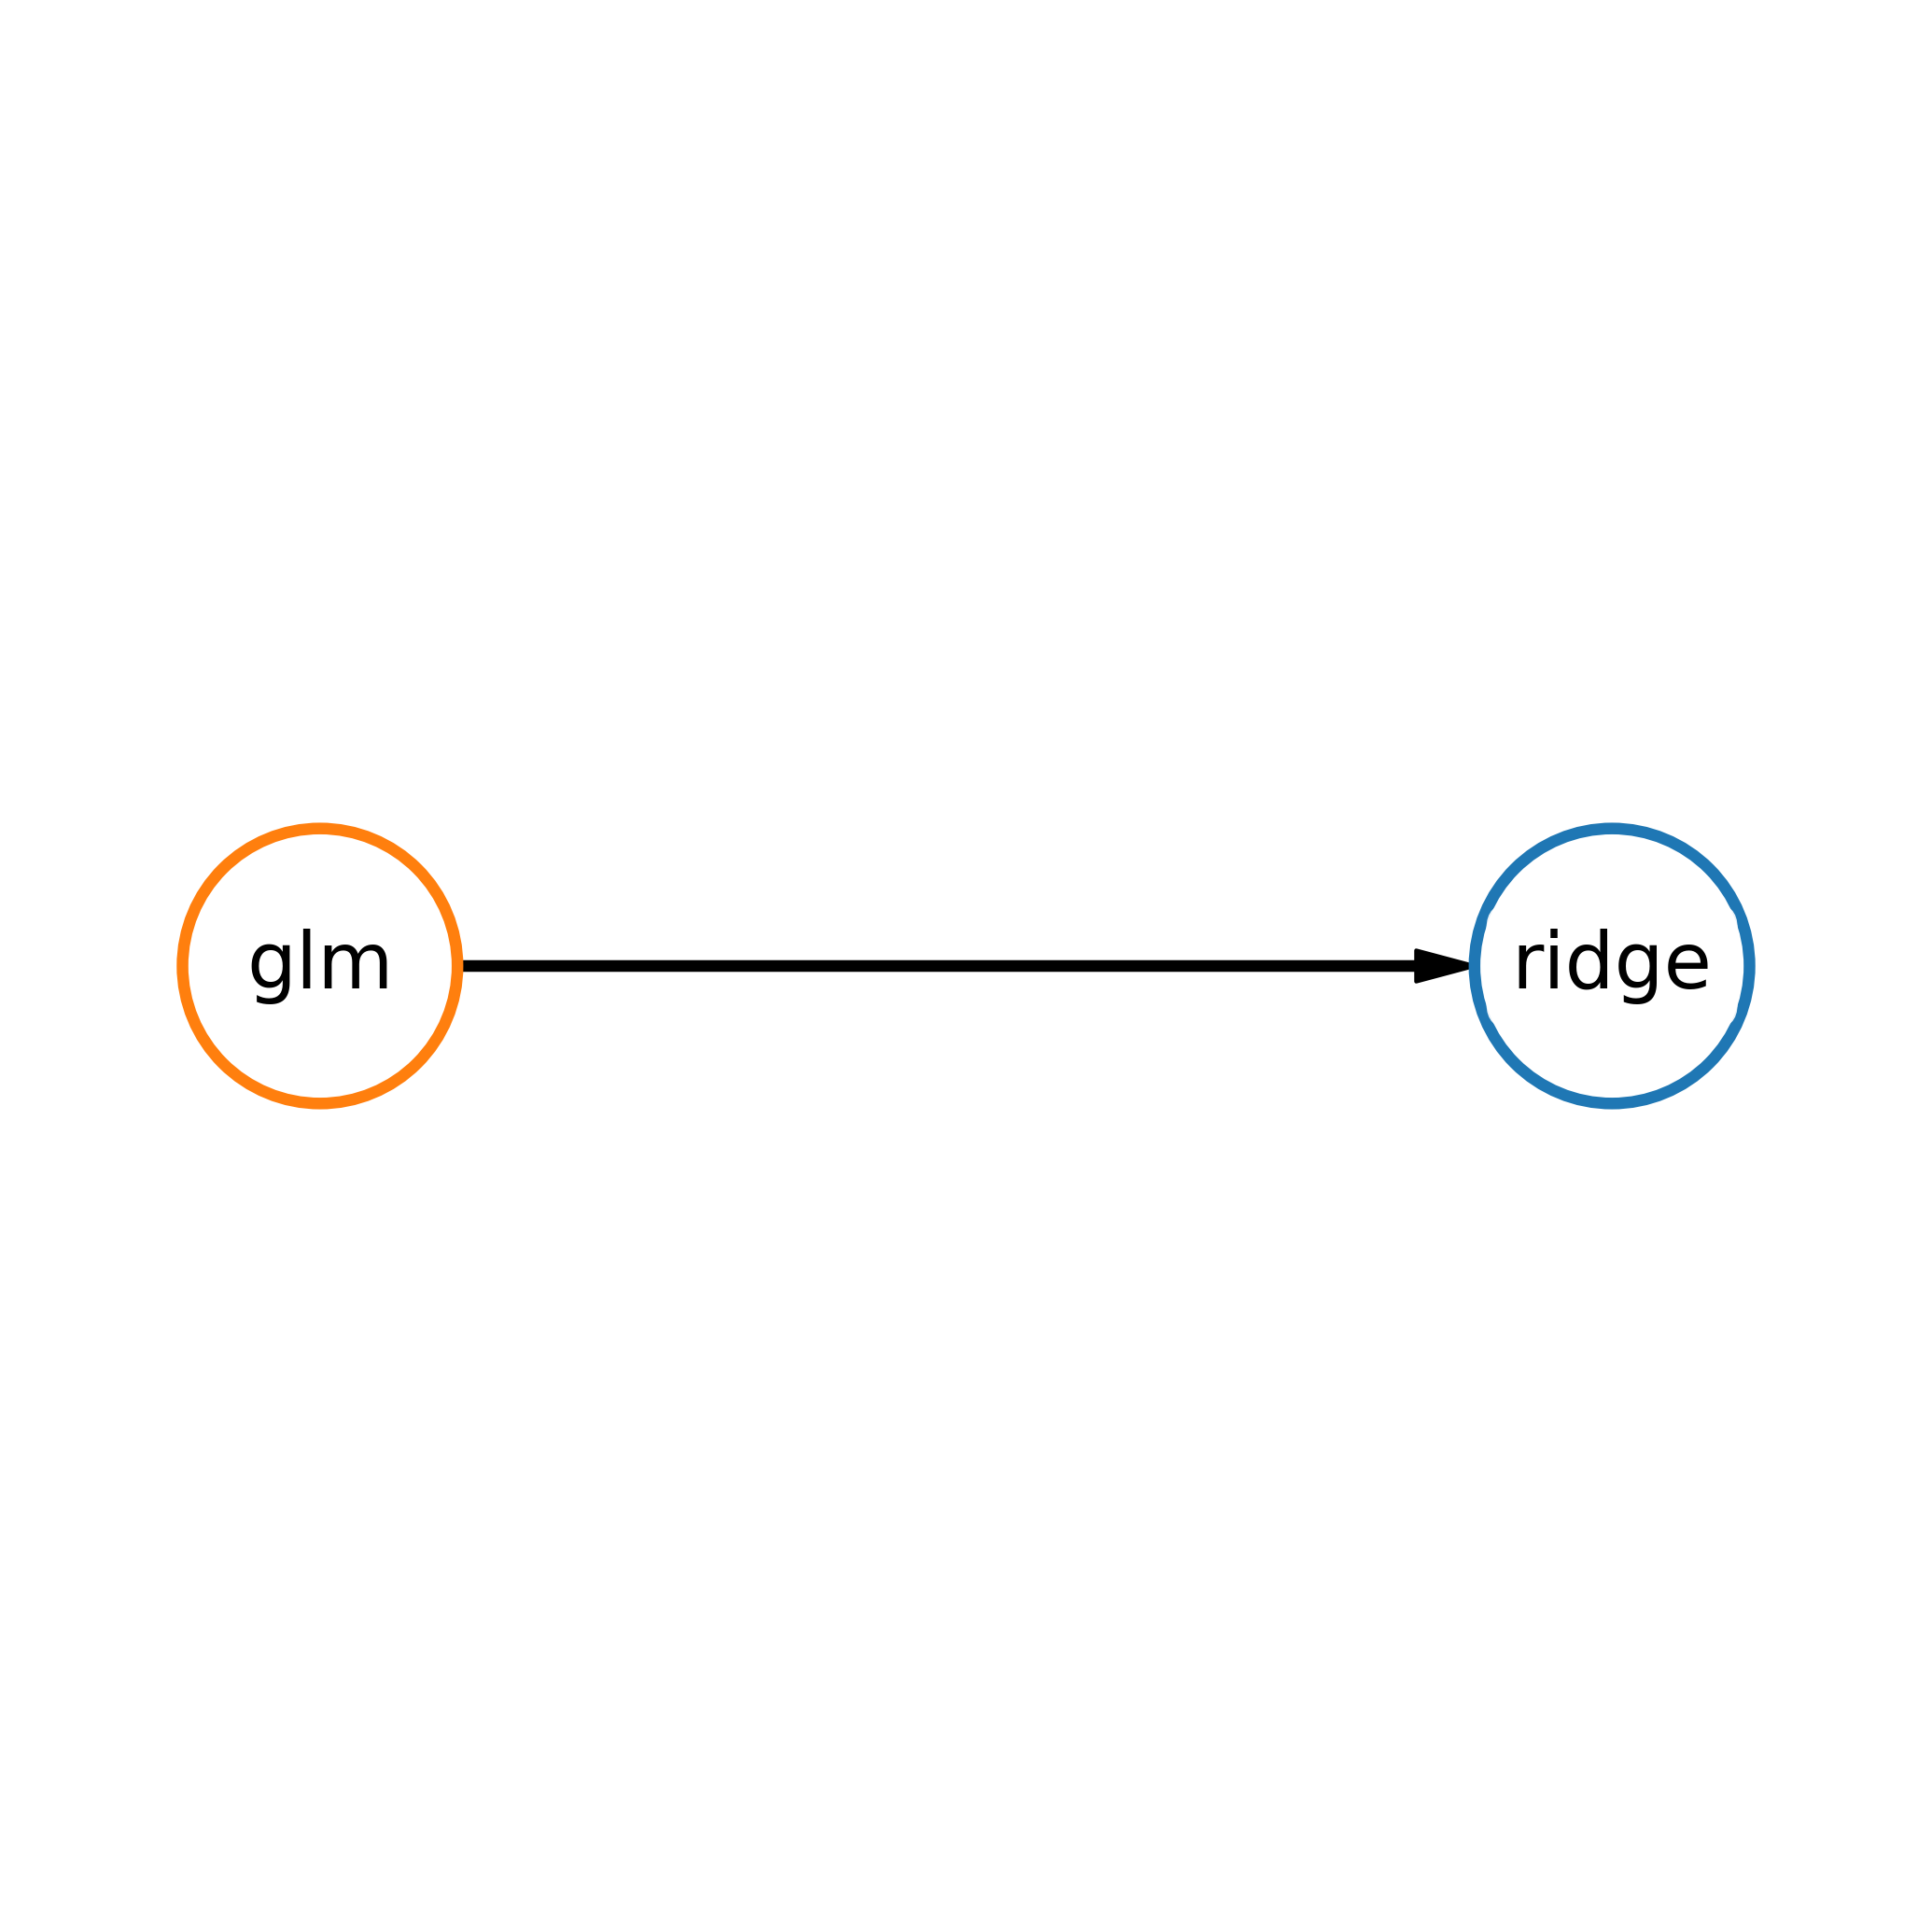

In [22]:
chain.show()

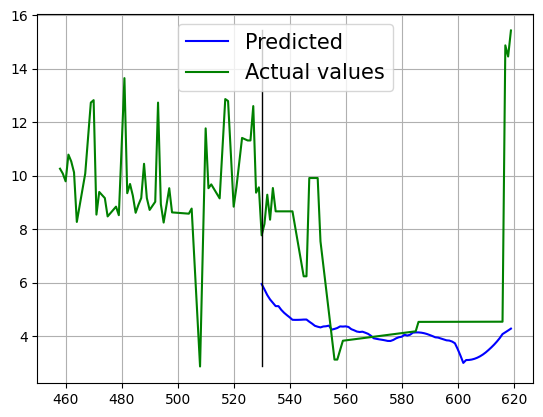

In [23]:
model.plot_prediction()